# Mood Classifier using Sequential Model and Sign Language Digits classifier using Functional API

### Links:

> Sequential model: https://www.tensorflow.org/guide/keras/sequential_model

> Functional API: https://www.tensorflow.org/guide/keras/functional

In [1]:
# Import packages
import math
import scipy
import pandas as pd
from PIL import Image
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

# Utility files
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline

In [2]:
print(tf. __version__)

2.3.0


## Sequential Model

**Task:** create a model that determines whether the people in the images are smiling or not.

**Sequential model in a nutshell:** Helps build the model layer by layer. Ideal for  One input tensor and one output tensor. Works like a Python list and is suitable for linear models.

### Prepare the data

In [3]:
# Split the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [4]:
print("Number of training examples = ", X_train.shape[0])
print("Number of test examples = ", X_test.shape[0])

Number of training examples =  600
Number of test examples =  150


In [5]:
# Shape of training and test sets
X_train.shape, X_test.shape

((600, 64, 64, 3), (150, 64, 64, 3))

In [6]:
input_shape = X_train.shape[1:]

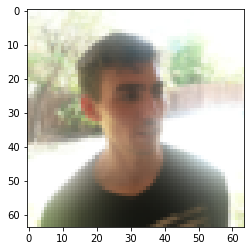

In [7]:
# View an image from our training set
index = 599
plt.imshow(X_train_orig[index])
plt.show()

In [8]:
def happyModel():
    """
    -- TF Sequential model --  
    """
    model = tf.keras.Sequential([
        
        tf.keras.Input(shape=input_shape),
        
        tfl.ZeroPadding2D(padding=3),
        
        tfl.Conv2D(filters=32, kernel_size=7, strides=1),
        
        tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001),
        
        tfl.ReLU(),
        
        tfl.MaxPool2D(),
        
        tfl.Flatten(),
        
        tfl.Dense(1, activation='sigmoid')
    ])
    
    return model

In [9]:
happy_model = happyModel()

for layer in summary(happy_model):
    print(layer)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']


In [10]:
# Compile the model
happy_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [11]:
# Summary of our sequential model
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [12]:
# Train the model
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16);

Epoch 1/10
38/38 [==============================] - 0s 7ms/step - loss: 1.5704 - accuracy: 0.6483
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2673 - accuracy: 0.8900
Epoch 3/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2452 - accuracy: 0.8950
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1054 - accuracy: 0.9650
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0755 - accuracy: 0.9800
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0682 - accuracy: 0.9850
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0744 - accuracy: 0.9717
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0912 - accuracy: 0.9667
Epoch 9/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2143 - accuracy: 0.9317
Epoch 10/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4249 - accuracy: 0.8650


In [13]:
# Test our model on the test set
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 10ms/step - loss: 1.4047 - accuracy: 0.6533


[1.4046655893325806, 0.653333306312561]

## Functional API

**Task:** create a model to recognize sign language digits.

**Functional API in a nutshell:** The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

### Prepare the data

In [14]:
# Load the dataset
X_train_sign_orig, Y_train_sign_orig, X_test_sign_orig, Y_test_sign_orig, classes_sign = load_signs_dataset()

In [15]:
# Normalize dataset
X_train_sign = X_train_sign_orig/255
X_test_sign = X_test_sign_orig/255

# One-hot-encode the vectors
Y_train_sign = convert_to_one_hot(Y_train_sign_orig, 6).T
Y_test_sign = convert_to_one_hot(Y_test_sign_orig, 6).T

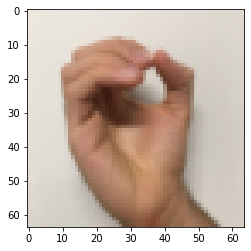

In [16]:
# View an image from our training set
plt.imshow(X_train_sign_orig[1]);

In [17]:
# Label of our image 
Y_train_sign[1]

array([1., 0., 0., 0., 0., 0.])

In [18]:
print("Number of training examples:", X_train_sign.shape[0])
print("Number of test examples:", X_test_sign.shape[0])
print("Train to test examples ratio:", X_train_sign.shape[0]/X_test_sign.shape[0])

Number of training examples: 1080
Number of test examples: 120
Train to test examples ratio: 9.0


In [19]:
def convolutional_model(input_shape):
    """
    Implements forward propagation of a ConvNet to identify sign language digits 
    using the TensorFlow Keras Functional API

    Arguments:
    -- input_shape: shape of input vector for the input node

    Returns:
    -- model: TF Keras model (object containing the information for the entire training process)
    """

    # Input node
    input_img = tf.keras.Input(shape=input_shape)
  
    # Convolution step with 8 filters and each kernel of 4 * 4 dim.
    Z1 = tfl.Conv2D(filters = 8, kernel_size=4, padding='same', strides=1)(input_img)
  
    # Compute elementwise ReLU
    A1 = tfl.ReLU()(Z1)
  
    # Applying pooling 
    P1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='SAME')(A1)

    Z2 = tfl.Conv2D(filters = 16, kernel_size=2, padding='same', strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding="SAME")(A2)
  
    # Flatten each training or test examples into a 1D vector Ex: (batch, h, w, c) --> (batch, h*w*c)
    F = tfl.Flatten()(P2)

    # Fully connected layer - automatically intializes the weights, and has 6 units in the layer for each digit
    outputs = tfl.Dense(units=6, activation='softmax')(F)
  
    model = tf.keras.Model(inputs=input_img, outputs=outputs)

    return model

In [20]:
# Shape of input vector
input_shape_sld = X_train_sign.shape[1:]

In [21]:
conv_model = convolutional_model(input_shape_sld)
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
conv_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)         

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_sign, Y_train_sign)).batch(64)
# Validation data
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_sign, Y_test_sign)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset, verbose=0)

D:\Shaikh\Subjects of interest\1-Computer Science\13-Deep Learning\Projects\env\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


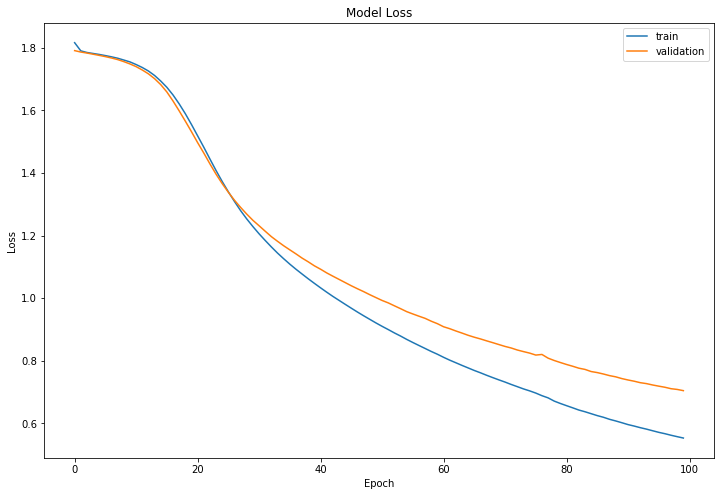

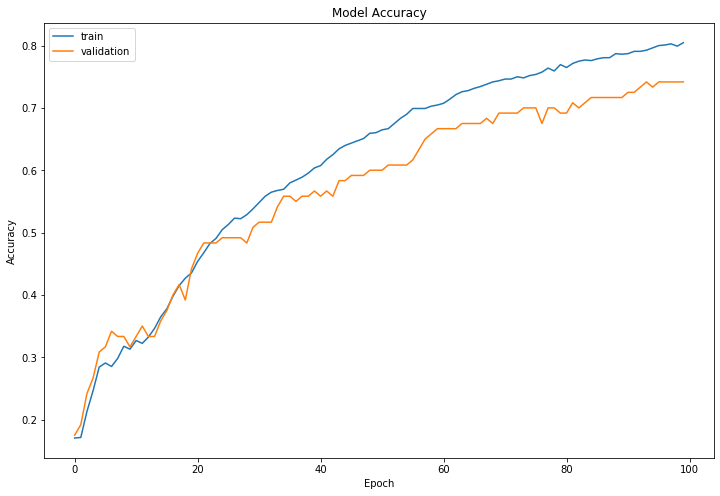

In [23]:
# Loss
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss': 'train', 'val_loss': 'validation'}, inplace=True)

# Accuracy
df_acc = df_loss_acc[['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy': 'train', 'val_accuracy': 'validation'}, inplace=True)

# Plot model loss and accuracy
df_loss.plot(title='Model Loss', figsize=(12, 8)).set(xlabel="Epoch", ylabel="Loss")
df_acc.plot(title='Model Accuracy', figsize=(12, 8)).set(xlabel="Epoch", ylabel="Accuracy");